# Predicting Heart Disease

This notebook uses Python based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has heart disease. 

Approach:
1. Problem definition
2. data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

**Problem Definition**\
Given clinical parameters about a patient, can we predict whether or not the patient has heart disease

**Data**\
UCI Machine Learning Repository\
data source: https://archive.ics.uci.edu/dataset/45/heart+disease

**Evaluation**\
Goal is to predict with 95% certainity whether or not a patient has heart disease

**Features**\
**Create data dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing Tools

In [1]:
# General Data Analysis / Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Data

In [2]:
## Loading Data
df = pd.read_csv('data/heart-disease.csv')
df.shape
    # returns (rows, columns)

(303, 14)

### Exploratory Data Analysis

1. What question(s) are oyu trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how to deal with it?
4. Where are the outliers and should they be removed?
5. What features can be removed, changed, or added to get more out of the data?

In [3]:
df.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1

In [4]:
df.tail(3) # returns the bottom of the df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
## Determine how many of each class there is
# Is the target balanced?

df.target.value_counts()
    # another way to access target: df['target']

target
1    165
0    138
Name: count, dtype: int64

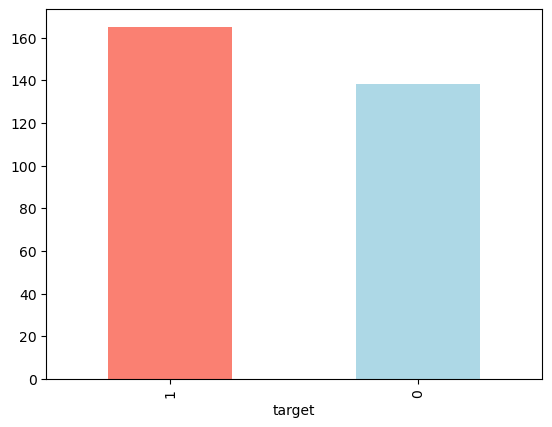

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
## Missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()
    # basic statistics on the features

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Heart Disease Frequency accoring to Sex

In [10]:
df.sex.value_counts()
# Twice as many males as females in the study

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)
    # creates a matrix between variables with counts

sex      0    1
target         
0       24  114
1       72   93

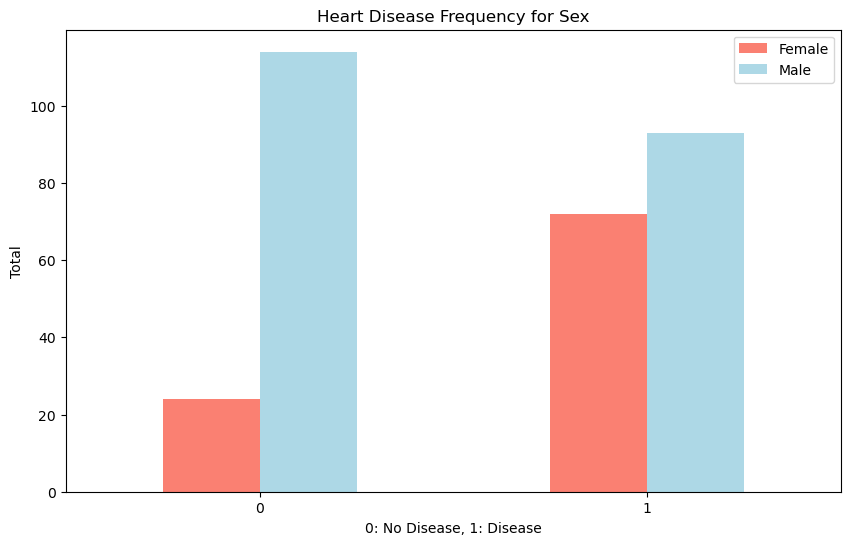

In [12]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                    color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0: No Disease, 1: Disease')
plt.ylabel('Total')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

In [13]:
df.head(2)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   

   ca  thal  target  
0   0     1       1  
1   0     2       1

In [14]:
df['thalach'].value_counts()
    # the returned length is the number of unique values

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

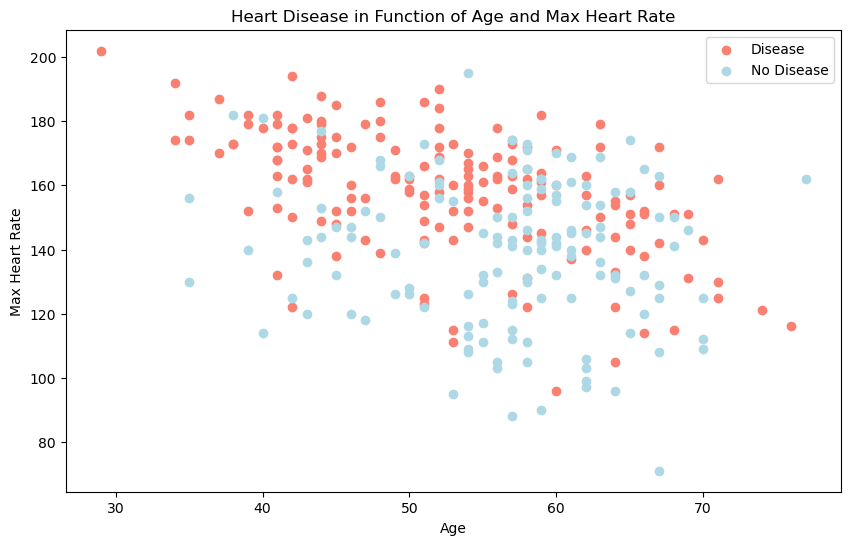

In [15]:
### Plot
plt.figure(figsize=(10,6))

# Scatter with heart disease
plt.scatter(df.age[df.target==1], # all the ages that have heart disease
           df.thalach[df.target==1], # maximum heart rates, with heart disease
           c='salmon') 

# Scatter without heart disease
plt.scatter(df.age[df.target==0], 
           df.thalach[df.target==0], 
           c='lightblue') 

plt.title('Heart Disease in Function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

### Check Distrubtion of Age

<Axes: ylabel='Frequency'>

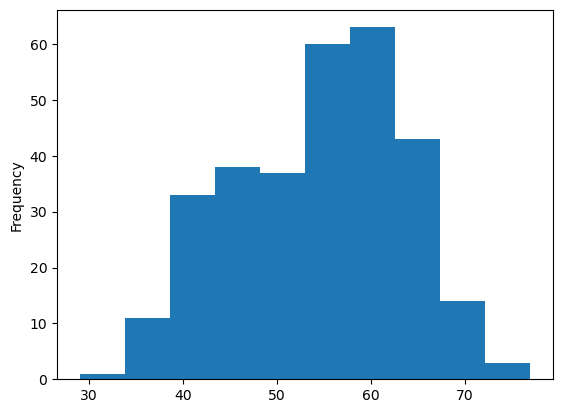

In [16]:
df.age.plot.hist()

### Chest Pain vs. Target

cp - chest pain type\
0: Typical angina: chest pain related decrease blood supply to the heart\
1: Atypical angina: chest pain not related to heart\
2: Non-anginal pain: typically esophageal spasms (non heart related)\
3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

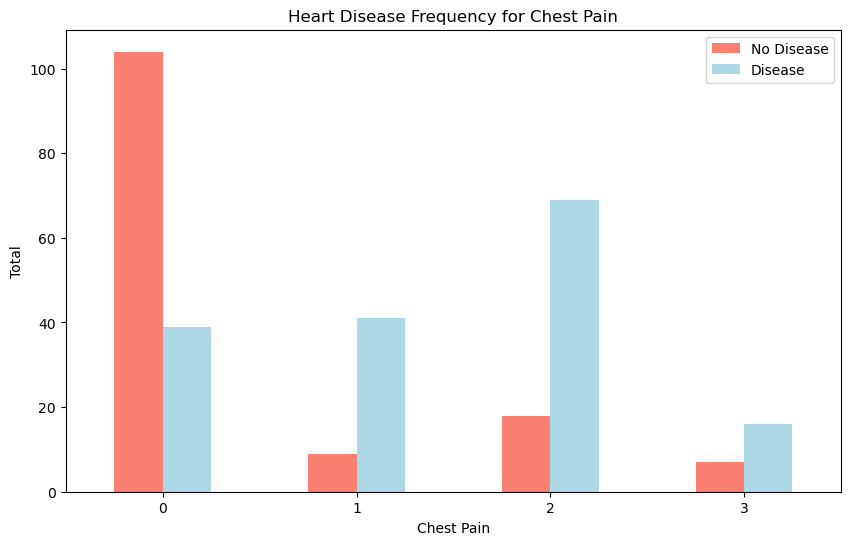

In [18]:
# Plot
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                    color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Chest Pain')
plt.xlabel('Chest Pain')
plt.ylabel('Total')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### Correlation Matrix

In [19]:
round(df.corr(),3)

age    sex     cp  trestbps   chol    fbs  restecg  thalach  \
age       1.000 -0.098 -0.069     0.279  0.214  0.121   -0.116   -0.399   
sex      -0.098  1.000 -0.049    -0.057 -0.198  0.045   -0.058   -0.044   
cp       -0.069 -0.049  1.000     0.048 -0.077  0.094    0.044    0.296   
trestbps  0.279 -0.057  0.048     1.000  0.123  0.178   -0.114   -0.047   
chol      0.214 -0.198 -0.077     0.123  1.000  0.013   -0.151   -0.010   
fbs       0.121  0.045  0.094     0.178  0.013  1.000   -0.084   -0.009   
restecg  -0.116 -0.058  0.044    -0.114 -0.151 -0.084    1.000    0.044   
thalach  -0.399 -0.044  0.296    -0.047 -0.010 -0.009    0.044    1.000   
exang     0.097  0.142 -0.394     0.068  0.067  0.026   -0.071   -0.379   
oldpeak   0.210  0.096 -0.149     0.193  0.054  0.006   -0.059   -0.344   
slope    -0.169 -0.031  0.120    -0.121 -0.004 -0.060    0.093    0.387   
ca        0.276  0.118 -0.181     0.101  0.071  0.138   -0.072   -0.213   
thal      0.068  0.210 -0.162     0.062  0.099 -0.032   -0.012   -0.096   
target   -0.225 -0.281  0.434    -0.145 -0.085 -0.028    0.137    0.422   

          exang  oldpeak  slope     ca   thal  target  
age       0.097    0.210 -0.169  0.276  0.068  -0.225  
sex       0.142    0.096 -0.031  0.118  0.210  -0.281  
cp       -0.394   -0.149  0.120 -0.181 -0.162   0.434  
trestbps  0.068    0.193 -0.121  0.101  0.062  -0.145  
chol      0.067    0.054 -0.004  0.071  0.099  -0.085  
fbs       0.026    0.006 -0.060  0.138 -0.032  -0.028  
restecg  -0.071   -0.059  0.093 -0.072 -0.012   0.137  
thalach  -0.379   -0.344  0.387 -0.213 -0.096   0.422  
exang     1.000    0.288 -0.258  0.116  0.207  -0.437  
oldpeak   0.288    1.000 -0.578  0.223  0.210  -0.431  
slope    -0.258   -0.578  1.000 -0.080 -0.105   0.346  
ca        0.116    0.223 -0.080  1.000  0.152  -0.392  
thal      0.207    0.210 -0.105  0.152  1.000  -0.344  
target   -0.437   -0.431  0.346 -0.392 -0.344   1.000

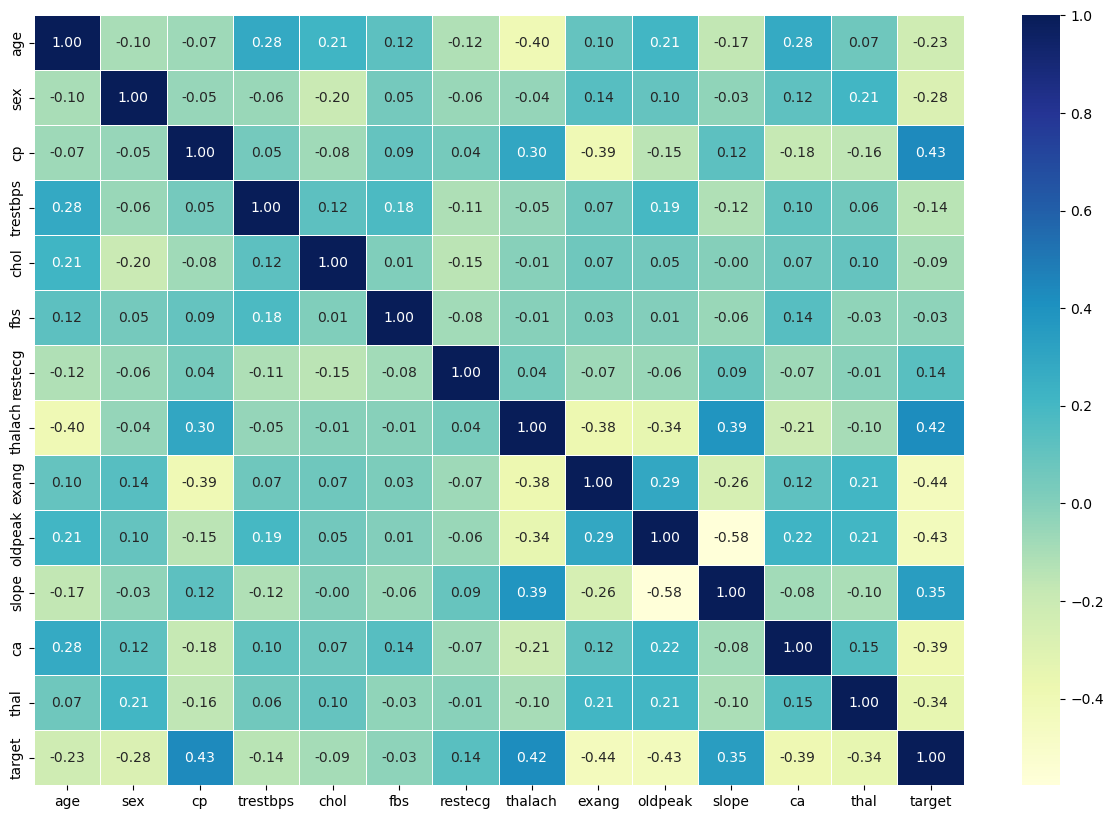

In [20]:
# Heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                fmt='.2f',
                linewidths=0.5,
                cmap='YlGnBu')

## Modeling

### Data Setup

In [21]:
df.head(2)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   

   ca  thal  target  
0   0     1       1  
1   0     2       1

In [22]:
### Split Data into X and Y
x = df.drop('target', axis=1)
y = df.target

In [23]:
### Train and Test Split
np.random.seed(42) # allows the results to be reproducable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Model Selection

1. Logistic Regression
2. K-Nearest Neighbor Classifer
3. Random Forest Classifer

Scikit-Learn Model Selection Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [26]:
# Putting models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest Class': RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dictionary of different scikit-learn machine learning models
    x_train : independent vairable training data
    x_test : independent vairable testing data
    y_train : dependent variable training data
    y_test : dependent variable testing data
    '''
    np.random.seed(42) # so results are reproducable
    model_scores = {} # dictionary to store model scores

    ## Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append the results to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\kawal\Documents\ZTM\AI\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Class': 0.8360655737704918}

## Model Comparison

<Axes: >

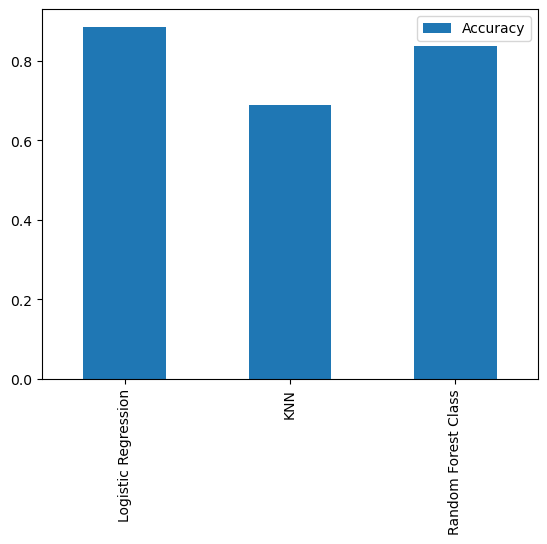

In [31]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy']) # turning model_scores dict into a dataframe
model_compare.T.plot.bar() # plotting a bar graph; syntax .T is transpose the dataframe